In [14]:
import numpy as np
import os
import h5py
import time
from matplotlib import pyplot

In [15]:
if 0:
    alt = 70
    folder_in = '/home/saturn/caph/mpp228/HESS_data/HESS_data_MC/sim_telarray/\
    phase2d/sim_telarray/phase2d/alt%i_h5/' % alt
else:
    folder_in = '/home/saturn/caph/mpp228/HESS_data/HESS_data_MC/sim_telarray/\
phase2d/NSB1.00/Desert/Proton/20deg/180deg/0.0deg-ws0/Data/Data_h5/'
fns_in = os.listdir(folder_in)

In [16]:
pfns_in = list(np.sort([fn for fn in fns_in if fn.find('proton') > -1]))
gfns_in = list(np.sort([fn for fn in fns_in if fn.find('gamma') > -1]))
print(len(pfns_in), len(gfns_in), len(fns_in))

2 0 2


In [18]:
#pfns_in[0], gfns_in[0]

In [19]:
from dl1_data_handler.reader import DL1DataReaderSTAGE1, DL1DataReaderDL1DH
if 1:
    channels_list = ['image']
    tel_pars_list = ['obs_id',] 
    mc_info_list = ["true_alt", "true_az"] # mc parameters
else:
    channels_list = ['image', 'image_mask', 'peak_time',]
    tel_pars_list = ['obs_id', 'event_id', 'tel_id', 
                     'camera_frame_hillas_intensity', 'camera_frame_hillas_x', 'camera_frame_hillas_y', 
                     'camera_frame_hillas_width', 'camera_frame_hillas_length',
                     'camera_frame_hillas_psi', 'camera_frame_hillas_skewness', 'camera_frame_hillas_kurtosis', 
                     'camera_frame_hillas_r', 'camera_frame_hillas_phi',
                'morphology_num_pixels', 'morphology_num_medium_islands', 'morphology_num_large_islands',
                'leakage_pixels_width_1', 'leakage_pixels_width_2', 
                'leakage_intensity_width_1', 'leakage_intensity_width_2',
                'intensity_mean'] # tel parameters in cta-pipe .h5
    
    mc_info_list = ["true_energy", "true_alt", "true_az"] # mc parameters
groups = ['mc_pars', 'tel_pars', 'tel_pars_extra']
mapping_settings = {'camera_types':['HESS-I']}
event_selection = None
def fn2reader(fn, mode='mono'):
    return DL1DataReaderSTAGE1([fn],
                             mode=mode,
                             #example_identifiers_file="./examples.h5",
                             #selected_telescope_types=selected_telescope_types,
                             mapping_settings=mapping_settings,
                             #selected_telescope_ids={"LST_LST_LSTCam": LSTcams},
                             #image_channels = ['image', 'peak_time', 'image_mask'],
                             image_channels=channels_list,
                             parameter_list=tel_pars_list,
                             event_info=mc_info_list,
                             event_selection=event_selection)

In [20]:
fn = folder_in + pfns_in[0]
reader = fn2reader(fn)

In [21]:
%%time
alt_az_p = np.array([r[2:] for r in reader]).T


CPU times: user 157 ms, sys: 6.94 ms, total: 164 ms
Wall time: 161 ms


Text(0.5, 1.0, 'Proton')

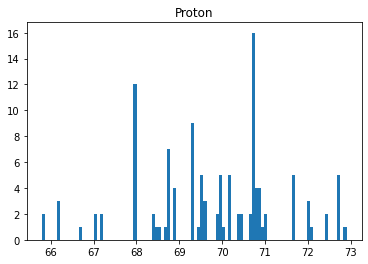

In [22]:
pyplot.hist(alt_az_p[0], bins=100);
pyplot.title('Proton')

Text(0.5, 1.0, 'Proton')

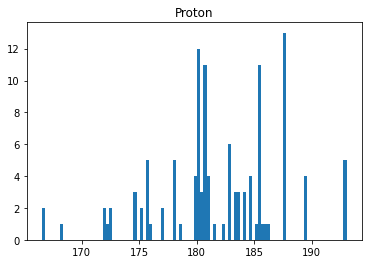

In [23]:
pyplot.hist(alt_az_p[1], bins=100);
pyplot.title('Proton')

In [24]:
%%time
fn = folder_in + gfns_in[0]
reader = fn2reader(fn)
alt_az_g = np.array([r[2:] for r in reader]).T


IndexError: list index out of range

Text(0.5, 1.0, 'Gamma')

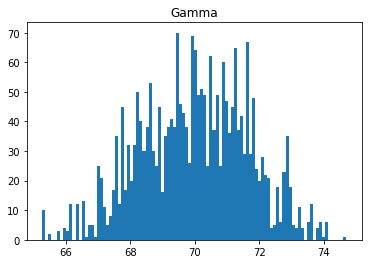

In [12]:
pyplot.hist(alt_az_g[0], bins=100);
pyplot.title('Gamma')

Text(0.5, 1.0, 'Gamma')

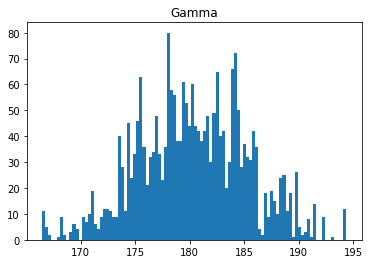

In [13]:
pyplot.hist(alt_az_g[1], bins=100);
pyplot.title('Gamma')

In [31]:
image = reader[0][0].T[0]

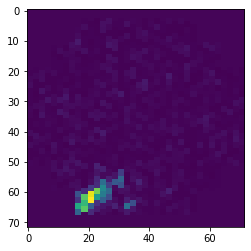

In [32]:
pyplot.imshow(image)